# Prediction of Term Deposit Subscription

## Introduction

### Using the Machine Learning Models we try to predict subscription to Bank Term Deposits for Clients 

#### Details about the dataset:
* age - numeric
* job - type of job
* marital - marital status(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default - has credit in default? (categorical: 'no','yes','unknown')
* housing - has housing loan? (categorical: 'no','yes','unknown')
* loan - has personal loan? (categorical: 'no','yes','unknown')

#### Data related to the last contact of the current campaign:
* contact - contact communication type (categorical: 'cellular','telephone')
* month - last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* duration - last contact duration, in seconds (numeric). 

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other features:
* campaign - number of contacts performed during this campaign and for this client
* pdays -  number of days that passed by after the client was last contacted from a previous campaign
* poutcome - outcome of the previous marketing campaign (categorical: 'failure','unknown','success')

#### Output variable (y - dependant variable)
* deposit - (binary - 'yes' or 'no')

### In this project we will learn:
#### - Data Exploration
#### - Feature Engineering
#### - Building training/validation/test samples
#### - model selection
#### - model evaluation


In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
# create data frame to read the data set
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### This data does not have any null values.

In [271]:
df.shape

(11162, 17)

In [272]:
#count the number of rows for each type
df.groupby('deposit').size()

deposit
no     5873
yes    5289
dtype: int64

In [273]:
df['OUTPUT_LABEL'] = (df.deposit == 'yes').astype('int')

In [274]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [275]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.474


#### The prevlence of the positive class is 47.4% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 47.4%.

## Exploring the dataset and unique values

In [276]:
print('Number of columns:',len(df.columns))

Number of columns: 18


In [277]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 76 unique values
job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
balance: 3805 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day: 31 unique values
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: 1428 unique values
campaign: 36 unique values
pdays: 472 unique values
previous: 34 unique values
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']
OUTPUT_LABEL
[1 0]


In [278]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,OUTPUT_LABEL
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,0


 ## Key Observations:
 
 ### * From the output of the code, we can see that there are roughly the same amount of categorical and numeric values in the columns
 ### * age, duration, campaign, pdays.
 ### * All the data input are non-null values, meaning that we have a value of every column.
 ### * Output 'deposit' has two values "yes" and "no"
 ### * Default, housing and loan have 3 values each "yes", "no" and "unknown".
 ### * We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call 'deposit' or 'y' is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 

In [279]:
#Explore categorical features
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [280]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


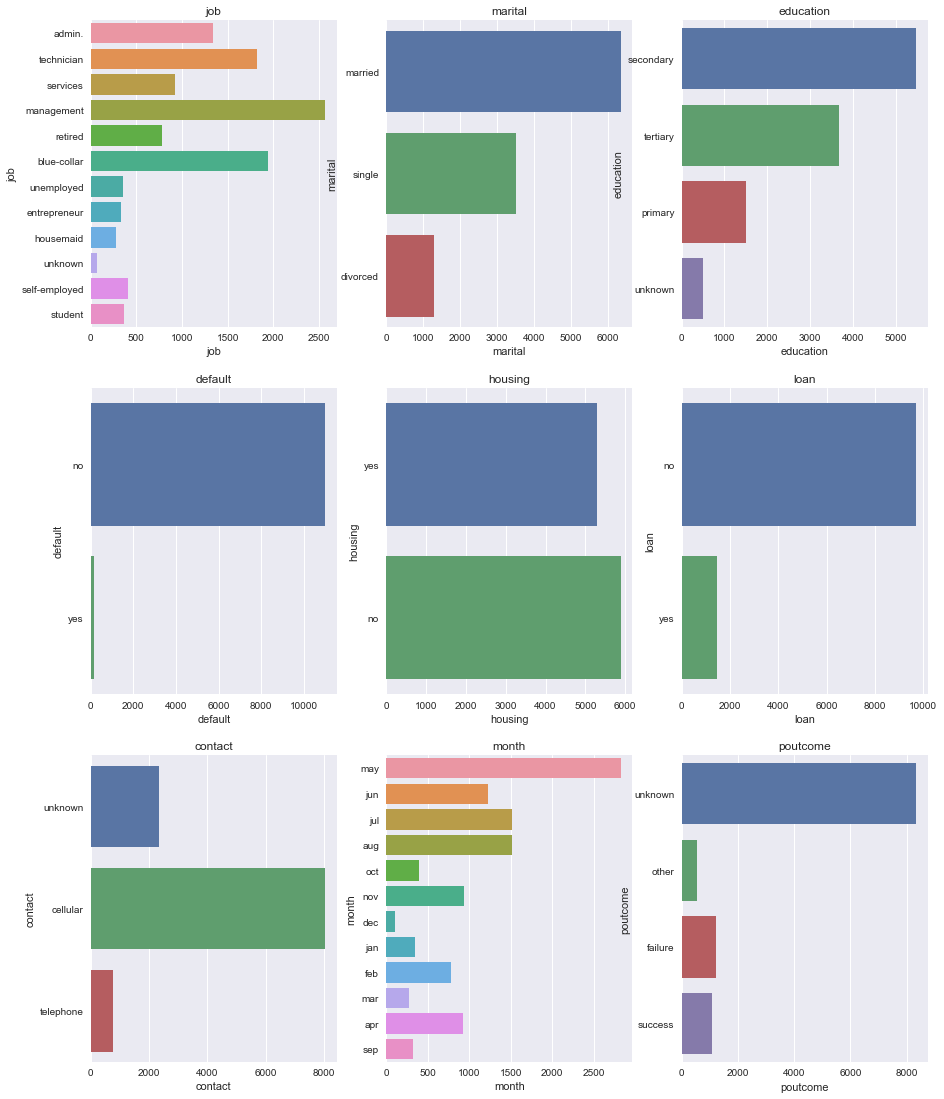

In [281]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

C:\Users\703311085\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\703311085\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


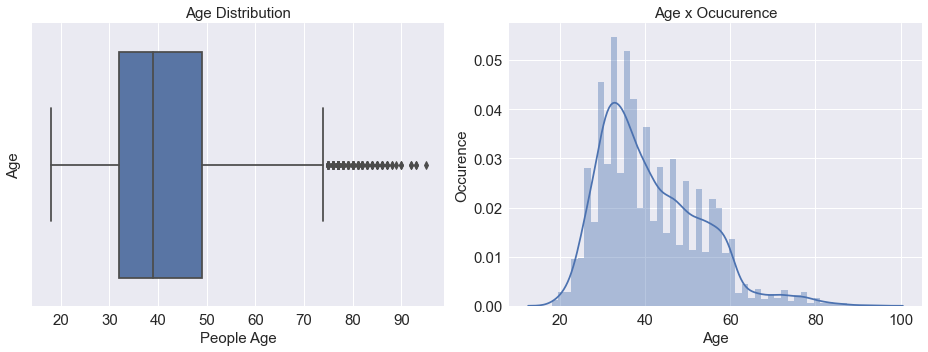

In [282]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [283]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome']

In [284]:
df[cols_cat].isnull().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

In [285]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month', 'poutcome',]
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Graphical Representation of Categorical Features

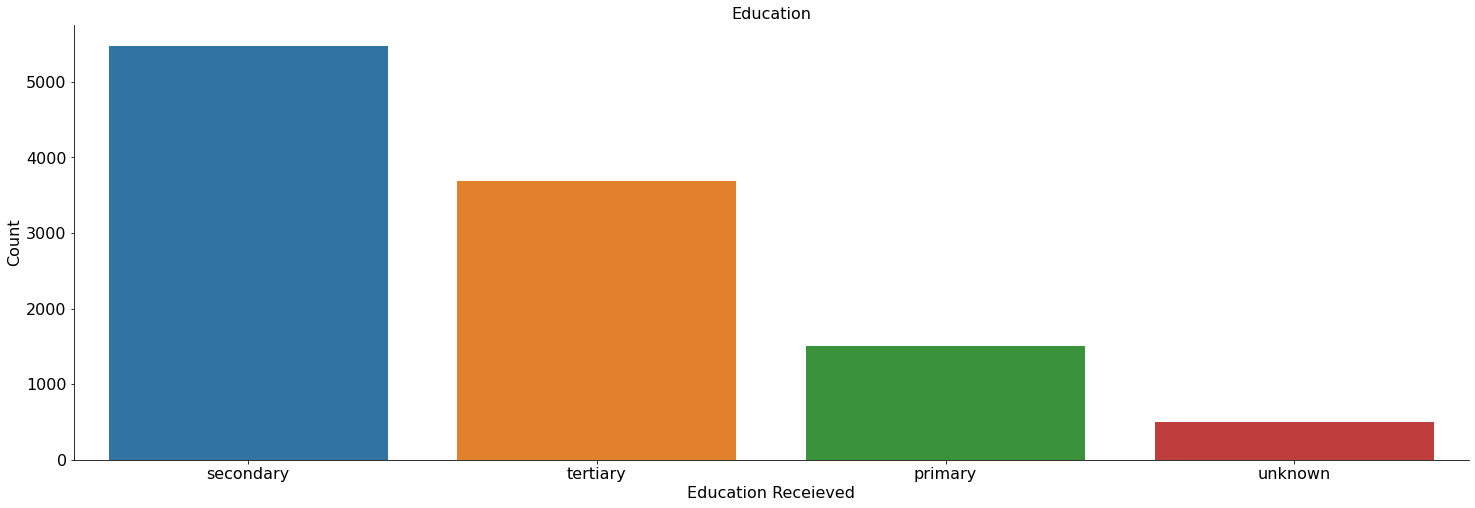

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

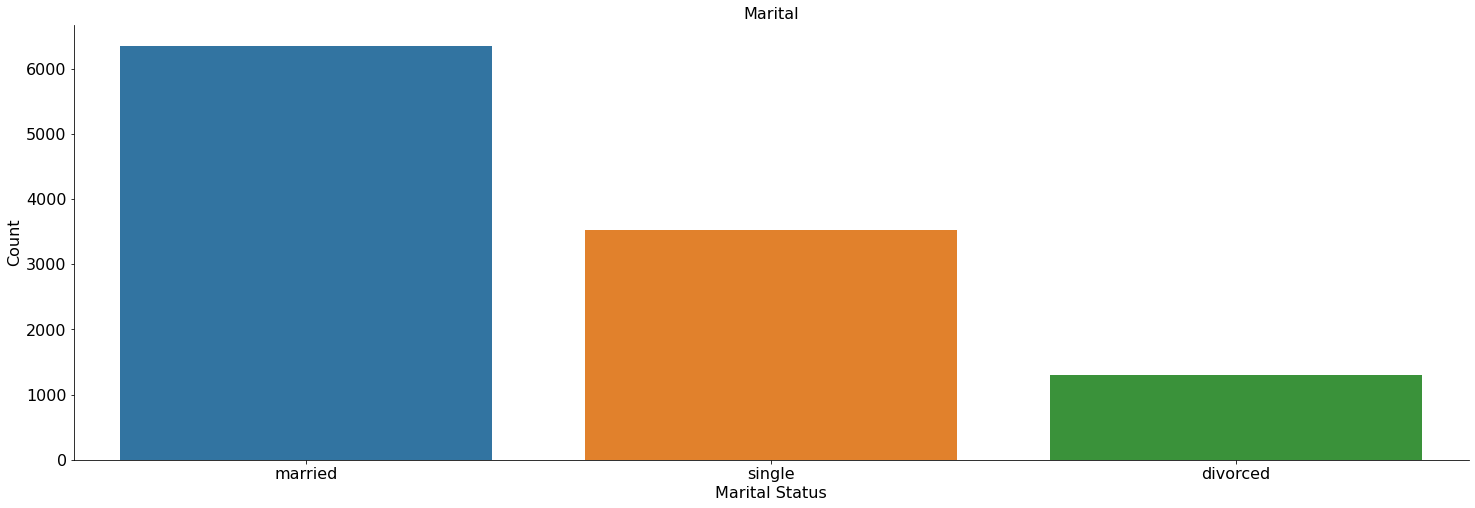

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

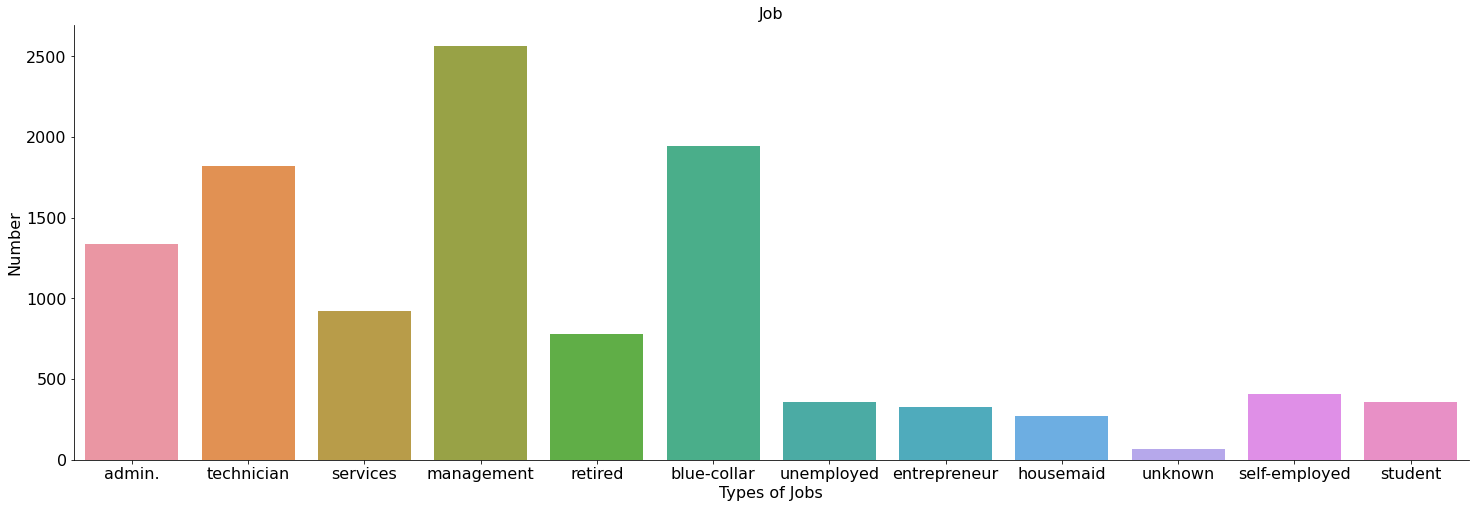

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

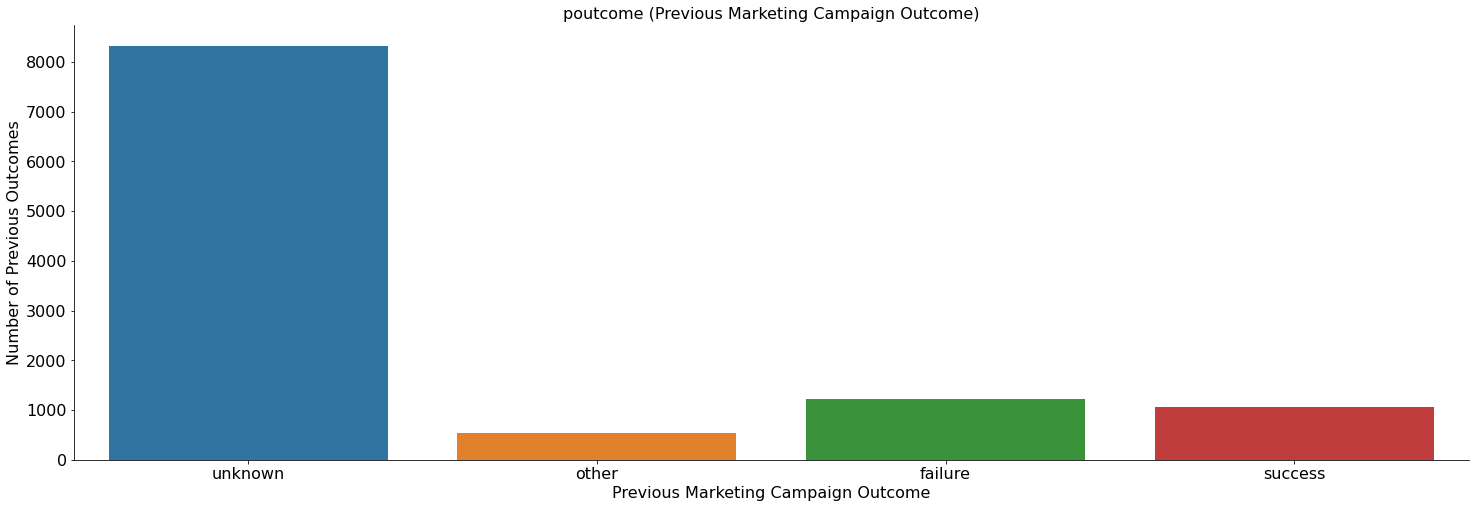

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

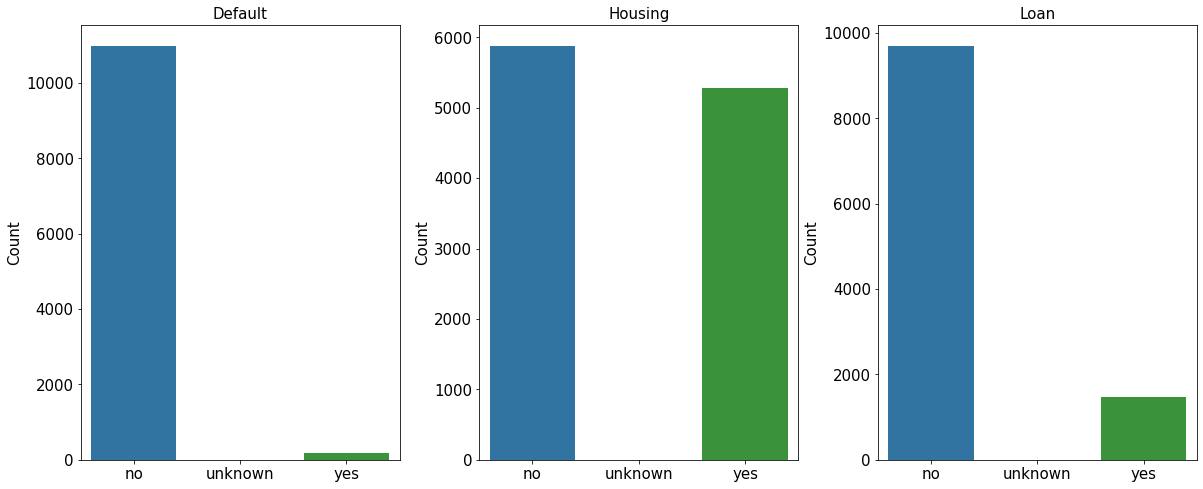

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

C:\Users\703311085\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\703311085\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


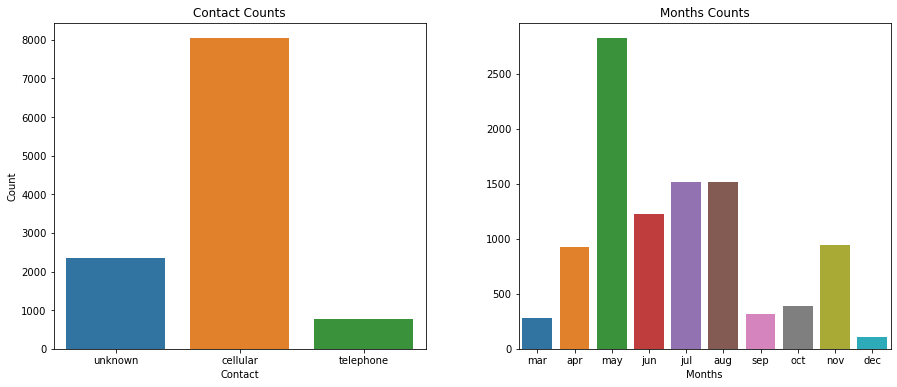

In [84]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [264]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [265]:
cols_all_cat=list(cols_new_cat.columns)

In [266]:
df[cols_all_cat].head()

,job_admin.,job_admin.,job_blue-collar,job_blue-collar,job_entrepreneur,job_entrepreneur,job_housemaid,job_housemaid,job_management,job_management,...,month_sep,month_sep,poutcome_failure,poutcome_failure,poutcome_other,poutcome_other,poutcome_success,poutcome_success,poutcome_unknown,poutcome_unknown
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [96]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day',
       ...
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object', length=106)

In [97]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,0,1,0,0,0,0,0,0,1


## Summary of Feature Engineering

In [98]:
cols_num = ['campaign', 'pdays']

In [158]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_all_cat + ['OUTPUT_LABEL']]
df = pd.concat([cols_new_cat,df['OUTPUT_LABEL']], axis = 1)
df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,OUTPUT_LABEL
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [159]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 46
Numerical Features: 2
Categorical Features: 44


# Building Training, Validation & Test Samples

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

In this project, we will split into 70% train, 15% validation, and 15% test.

Let's shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number of samples. random_state is just specified so the project is reproducable.

The training (df_train_all), validation (df_valid) and test (df_test) set were created below.

Shuffle the samples

In [160]:
df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,OUTPUT_LABEL
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11158,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11159,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
11160,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [161]:
X = df.drop(['OUTPUT_LABEL'],axis=1)
y = df[['OUTPUT_LABEL']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Model Selection

- Random Forest Classifier
- XGBoost Classifier
- Gradiend Boosting Classifier

- Random Forest Regressor

# Random Forest Classifier

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [299]:
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

[0.6668533  0.67805151 0.69092945 0.69316909 0.69411765]
0.6846242013042618


In [301]:
Rf=RandomForestClassifier(n_estimators=100)
Rf.fit(X_train,y_train)

y_pred1 = Rf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

C:\Users\703311~1\AppData\Local\Temp/ipykernel_16452/1916506726.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rf.fit(X_train,y_train)


Accuracy: 0.6824899238692342


In [302]:
print(len(X_train))
print(len(X_test))

8929
2233


In [304]:
report_dict = classification_report(y_test, np.round(y_pred), output_dict=True)
classification_report = pd.DataFrame(report_dict)

In [308]:
from sklearn.metrics import roc_curve
p_fpr, p_tpr, _ = roc_curve(y_test, np.round(y_pred1), pos_label=1)
auc1 = metrics.roc_auc_score(y_test, np.round(y_pred1))
print (auc1)

0.6770888160550236


No handles with labels found to put in legend.


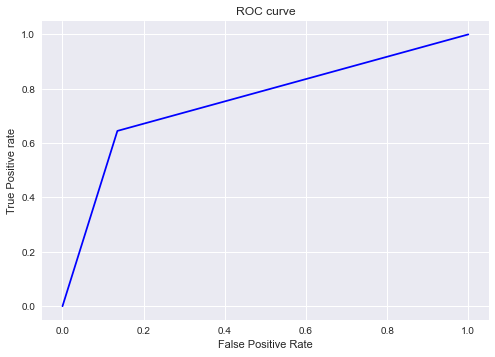

In [328]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC1',dpi=300)
plt.show();

In [310]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Rf.predict(X_test))
cm

array([[898, 307],
       [402, 626]], dtype=int64)

# XG Booster Classifier

In [311]:
from xgboost import XGBRegressor
model = XGBRegressor(n_jobs=-1, n_estimators=1000).fit(X_train, y_train)

In [312]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [313]:
model_xgb.fit(X,y)

C:\Users\703311085\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
model_xgb.score(X_test,y_test)

0.7635467980295566

In [316]:
y_pred2 = model_xgb.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7635467980295566


No handles with labels found to put in legend.


0.7548359623488383


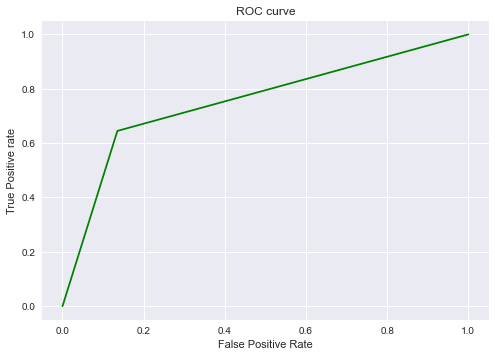

In [327]:
from sklearn.metrics import roc_curve
p_fpr, p_tpr, _ = roc_curve(y_test, np.round(y_pred2), pos_label=1)
auc2 = metrics.roc_auc_score(y_test, np.round(y_pred2))
print (auc2)

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(p_fpr, p_tpr, linestyle='-', color='green')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC2',dpi=300)
plt.show();

In [315]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[1042,  163],
       [ 365,  663]], dtype=int64)

# Random Forest Regressor

In [173]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [174]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [175]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [216]:
X_train.shape

(8929, 44)

In [215]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.2s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.1s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.9s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.7s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.7s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.6s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.6s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.7s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.2s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.9s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.9s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.5s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.4s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.4s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   5.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.1s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.1s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.1s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.2s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.4s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   2.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.7s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   9.6s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.1s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.3s


C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [217]:
predictions = rf_random.predict(X_test)
predictions

array([0.37398455, 0.85939515, 0.41161593, ..., 0.42393842, 0.44729252,
       0.36747868])

In [218]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [219]:
rf_random.best_score_

-0.19158890027330838

In [232]:
predictions=rf_random.predict(X_test)
print(predictions.shape)
print(y_test.shape)

(2233,)
(2233,)


C:\Users\703311085\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OUTPUT_LABEL', ylabel='Density'>

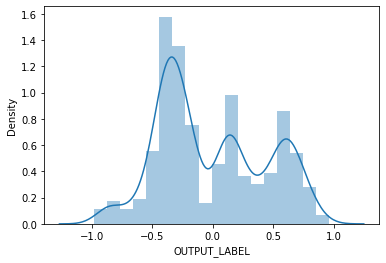

In [233]:
sns.distplot(y_test-predictions)

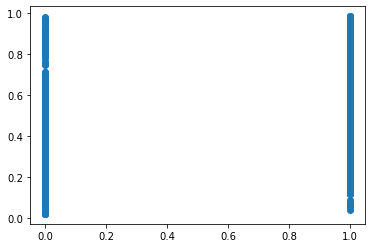

In [234]:
plt.scatter(y_test,predictions)

In [250]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, random_state=90)
regressor.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))

print("\n")
print("Printing predicted result...")
print("Result_of_Treatment = ", y_pred)

C:\Users\703311~1\AppData\Local\Temp/ipykernel_16452/3447409086.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


Training Accuracy =  0.5029648721523572
Test Accuracy =  0.08989198808217602


Printing predicted result...
Result_of_Treatment =  [0.37398455 0.85939515 0.41161593 ... 0.42393842 0.44729252 0.36747868]


In [251]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3872956740707025
MSE: 0.19596389219058902
RMSE: 0.44267809093130983


In [252]:
confusion_matrix(y_test, np.round(y_pred))

array([[1006,  199],
       [ 449,  579]], dtype=int64)

In [253]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,np.round(y_pred)))
print(classification_report(y_test,np.round(y_pred)))
print(accuracy_score(y_test, np.round(y_pred)))

[[1006  199]
 [ 449  579]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      1205
           1       0.74      0.56      0.64      1028

    accuracy                           0.71      2233
   macro avg       0.72      0.70      0.70      2233
weighted avg       0.72      0.71      0.70      2233

0.7098074339453649


# Gradient Boosting Classifier

In [239]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train, y_train)

C:\Users\703311085\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [322]:
y_pred3 = estimator.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.8047469771607703


No handles with labels found to put in legend.


0.7974397371522677


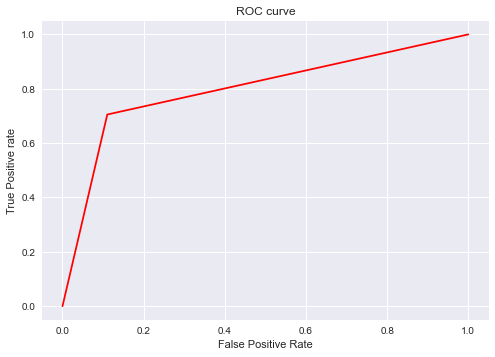

In [326]:
from sklearn.metrics import roc_curve
p_fpr, p_tpr, _ = roc_curve(y_test, np.round(y_pred3), pos_label=1)
auc3 = metrics.roc_auc_score(y_test, np.round(y_pred3))
print (auc3)

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(p_fpr, p_tpr, linestyle='-', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC3',dpi=300)
plt.show();

In [240]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

In [241]:
thresh = 0.5

In [242]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

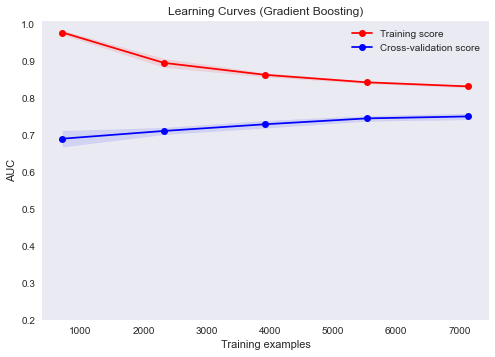

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1205
           1       0.84      0.71      0.77      1028

    accuracy                           0.80      2233
   macro avg       0.81      0.80      0.80      2233
weighted avg       0.81      0.80      0.80      2233



In [260]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
title = "Learning Curves (Gradient Boosting)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()
estimator.fit(X_test,y_test)
print(classification_report(y_test,estimator.predict(X_test)))


# Conclusion

### - Random Forest Classifier - 68%

### - XGBoost Classifier - 76%

### - Gradiend Boosting Classifier - 80%

### - Random Forest Regressor - 71%

In [339]:
import xlsxwriter
import datetime
from openpyxl import *
wb = Workbook()
ws = wb.active

In [370]:
# Here column=1 represents column A and row=1 represents first row.

import time


# import xlsxwriter module
import xlsxwriter
wb = Workbook()
ws = wb.active
ws.cell(row=1, column=1).value = "Current Date and Time"
time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
ws.cell(row=2, column=1).value = time
# Workbook() takes one, non-optional, argument
# which is the filename that we want to create.

In [372]:
import time
fileName = 'TermDeposit_' + time.strftime("%Y%m%d-%H%M%S") + '.xlsx'

# import xlsxwriter module
import xlsxwriter

# Workbook() takes one, non-optional, argument
# which is the filename that we want to create.

workbook = xlsxwriter.Workbook(fileName)


# The workbook object is then used to add new
# worksheet via the add_worksheet() method.
worksheet1 = workbook.add_worksheet('Sheet1')
 
# Use the worksheet object to write
# data via the write() method.
worksheet1.write('A4','Random Forest Regressor')
worksheet1.write('B3', 'MAE')
worksheet1.write('B4', metrics.mean_absolute_error(y_test, predictions))
worksheet1.write('C3', 'MSE')
worksheet1.write('C4', metrics.mean_squared_error(y_test, predictions))
worksheet1.write('D3', 'RMSE')
worksheet1.write('D4', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
worksheet1.write('E3', 'AUC')
worksheet1.write('E4', auc)

worksheet1.write('A7', 'Random Forest Classifier')
worksheet1.insert_image('A8', 'ROC1.png')
worksheet1.write('A17', 'Random Forest Classifier')
worksheet1.insert_image('A18', 'ROC2.png')
worksheet1.write('A27', 'Random Forest Classifier')
worksheet1.insert_image('A28', 'ROC3.png')

# Finally, close the Excel file
# via the close() method.
wb.close()